# Image Restoration

Complete the indicated functions for generating noise and for applying filters. The function for generating uniform noise serves as a template. In the last cell is the code for testing the results, here you need to fill in the values of the necessary parameters.

In [36]:
import cv2
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def uniform_noise(img, low, high):
    """
    Application of the uniform noise to the image in range low, high
    
    Parameters
    ----------
    img : ndarray
        Image
    low : float
        lower boundary of the range for the noise generation
    high : float
        upper boundary of the range for the noise generation
    
    Returns
    ----------
    tuple
        img+noise, noise as img, generated noise
    """
    
    img_noise = img.copy().flatten()
    
    noise_rnd = np.random.uniform(low, high, img_noise.shape) 

    mask_add = np.zeros(img_noise.shape, np.uint8)
    mask_sub = np.zeros(img_noise.shape, np.uint8)
    
    mask_add[np.where(noise_rnd >= 0)] = 1
    mask_sub[np.where(noise_rnd < 0)] = 1
   
    img_noise[mask_add.astype(bool)] = cv2.add(img_noise, (noise_rnd * 255).astype(np.uint8), mask=mask_add).flatten()[mask_add.astype(bool)]
    img_noise[mask_sub.astype(bool)] = cv2.subtract(img_noise, np.abs((noise_rnd * 255)).astype(np.uint8), mask=mask_sub).flatten()[mask_sub.astype(bool)]

    noise = noise_rnd.reshape(img.shape)+0.5

    return img_noise.reshape(img.shape), noise, (noise_rnd*255).flatten()

In [53]:
def gaussian_noise(img, mu, sigma):
    """
    Application of the gaussian noise to the image
    
    Parameters
    ----------
    img : ndarray
        Image
    mu : float
        gaussian distribution parameter
    sigma : float
        gaussian distribution parameter
    
    Returns
    ----------
    tuple
        img+noise, noise as img, generated noise
    """
    
    # replace following dummy code by your code
    
    noise_rnd = np.zeros(img.shape) 
    noise = noise_rnd.astype(np.uint8)
    img_noise = img + noise # noise application
       
    return img_noise.reshape(img.shape), noise, (noise_rnd*255).flatten()

In [54]:
def saltnpepper_noise(img, p_pepper, p_salt):
    """
    Application of the salt&pepper noise to the image, use the uniform probability distribution.
    
    Parameters
    ----------
    img : ndarray
        Image
    p_pepper : float
        Pepper probability
    p_salt : float
        Salt probability
        
    Returns
    ----------
    tuple
        img+noise, noise as img, generated noise
    """
    
    # replace following dummy code by your code
    
    noise_rnd = np.zeros(img.shape) 
    noise = noise_rnd.astype(np.uint8)
    img_noise = img + noise # noise application
       
    return img_noise.reshape(img.shape), noise, (noise_rnd*255).flatten()

In [55]:
def exponential_noise(img, _lambda):
    """
    Application of the exponential noise to the image.
    
    Parameters
    ----------
    img : ndarray
        Image
    _lambda : float
        Exponential probability parameter
        
    Returns
    ----------
    tuple
        img+noise, noise as img, generated noise
    """
    
    # replace following dummy code by your code
    
    noise_rnd = np.zeros(img.shape) 
    noise = noise_rnd.astype(np.uint8)
    img_noise = img + noise # noise application
       
    return img_noise.reshape(img.shape), noise, (noise_rnd*255).flatten()

In [56]:
def averaging(img, kernel_size, sigma_x):
    """
    Application of the mean filter to the noisy image.
    
    Parameters
    ----------
    img : ndarray
        Image
    k_size : int
        blurring kernel size.
        
    Returns
    ----------
    tuple
        processed image
    """
    
    # replace following dummy code by your code
    
    return img

In [57]:
def median_blurring(img, ksize):
    """
    Application of the median blurring to the noisy image.
    
    Parameters
    ----------
    img : ndarray
        Image
    ksize: int
        aperture linear size
            
    Returns
    ----------
    tuple
        processed image
    """
    
    # replace following dummy code by your code
    
    return img

In [58]:
def min_filter(img, kernel):
    """
    Application MIN filter to the noisy image.
    
    Parameters
    ----------
    img : ndarray
        Image
    kernel: np.ndarray
        structuring element used for erosion
            
    Returns
    ----------
    tuple
        processed image
    """
    
    # replace following dummy code by your code
    
    return img

In [59]:
def max_filter(img, kernel):
    """
    Application MAX filter to the noisy image.
    
    Parameters
    ----------
    img : ndarray
        Image
    kernel: np.ndarray
        structuring element used for dilation
            
    Returns
    ----------
    tuple
        processed image
    """
    
    # replace following dummy code by your code
    
    return img

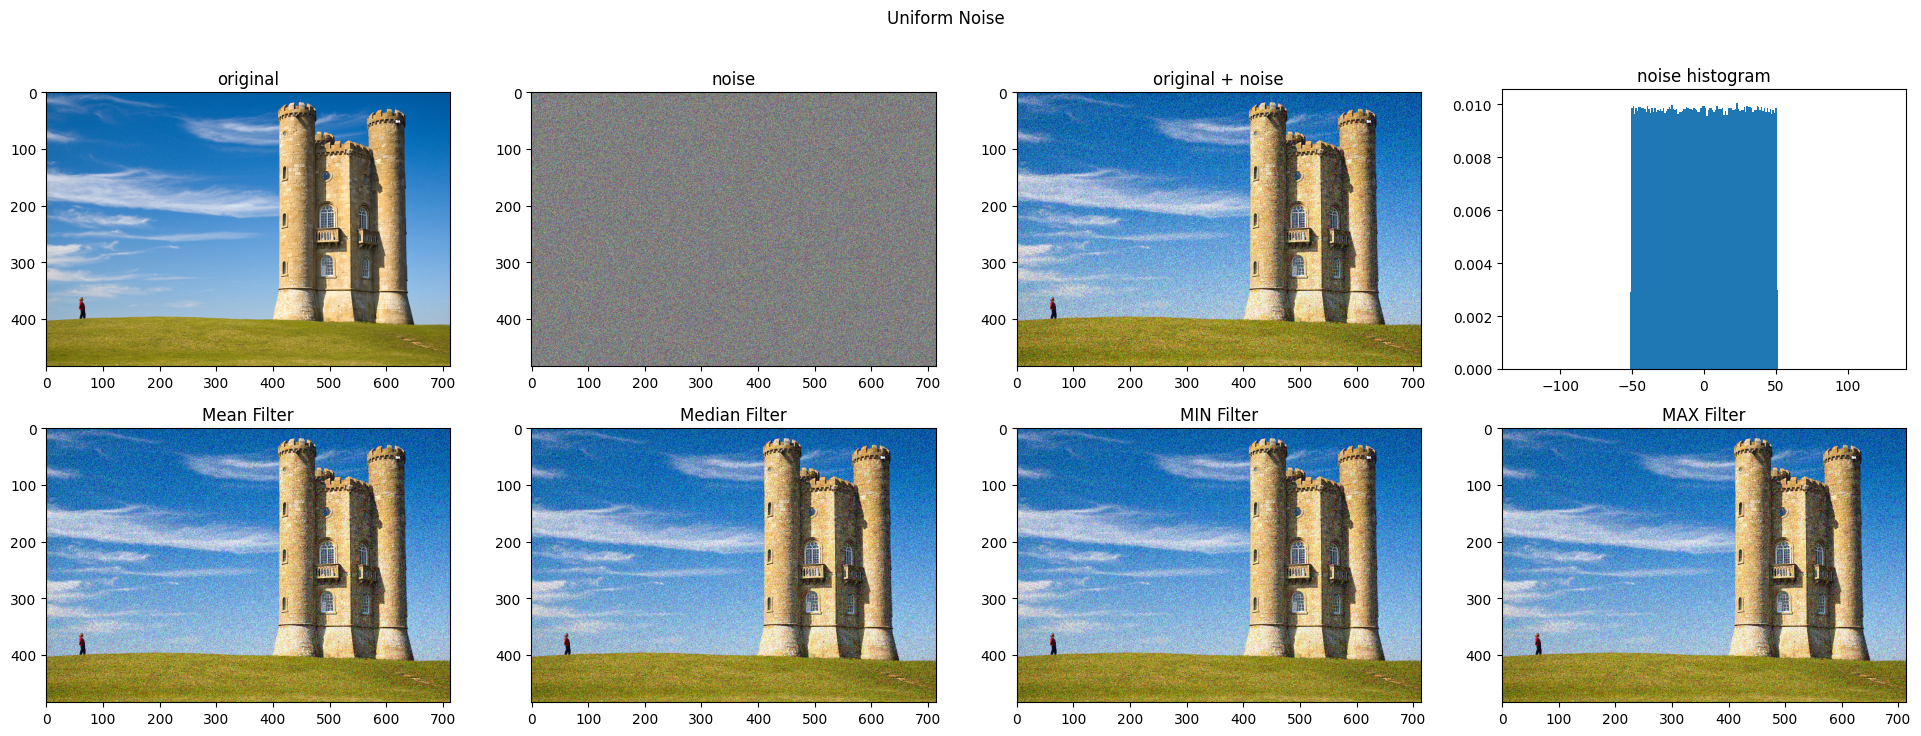

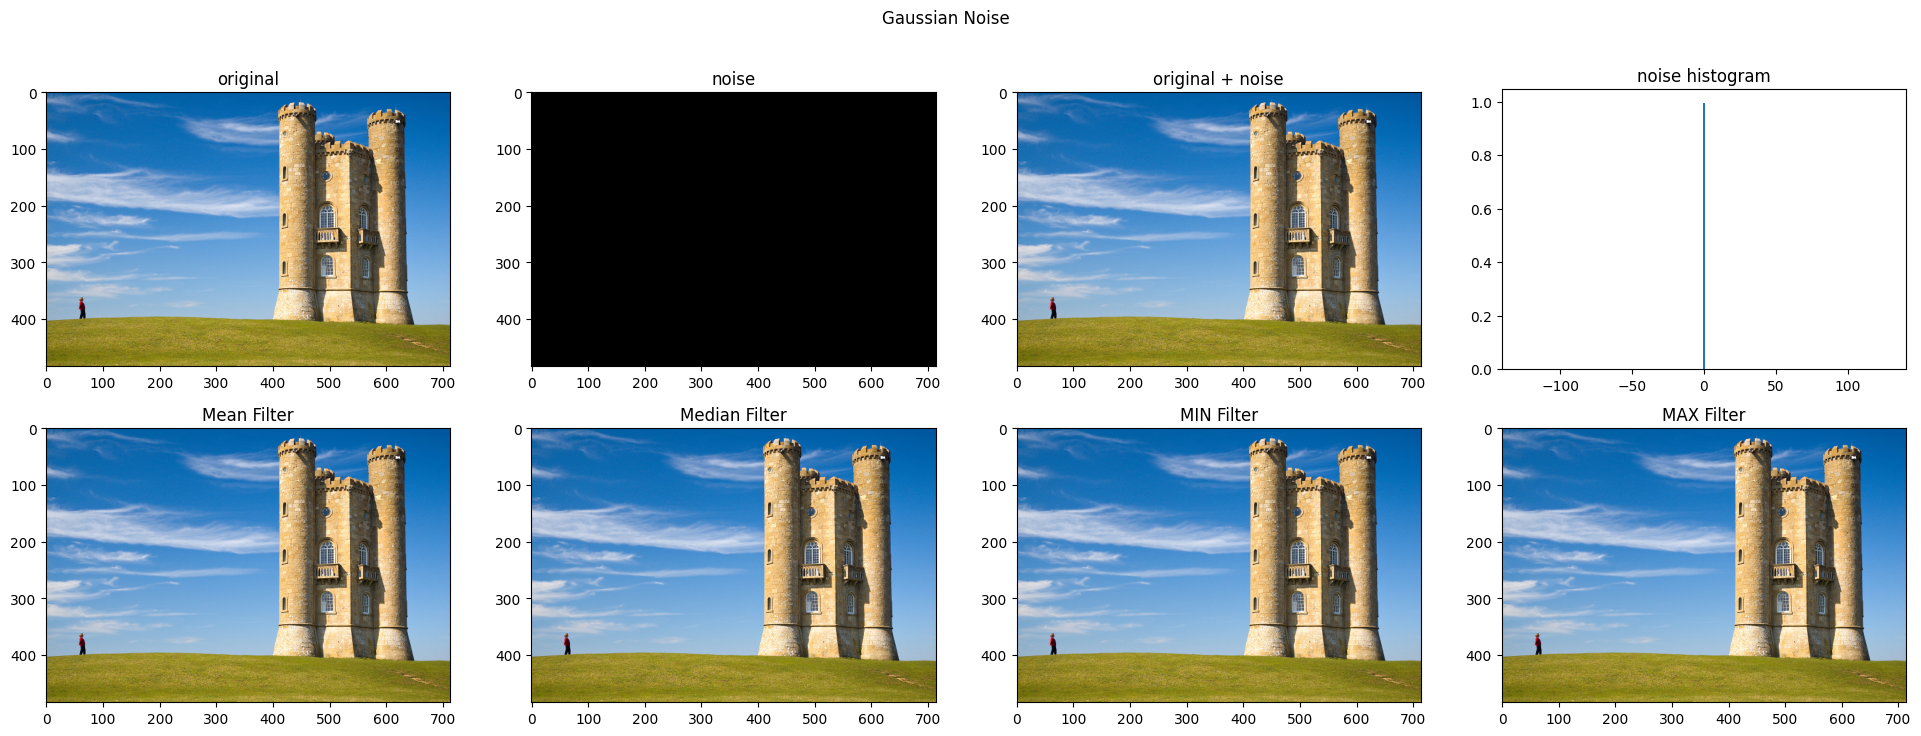

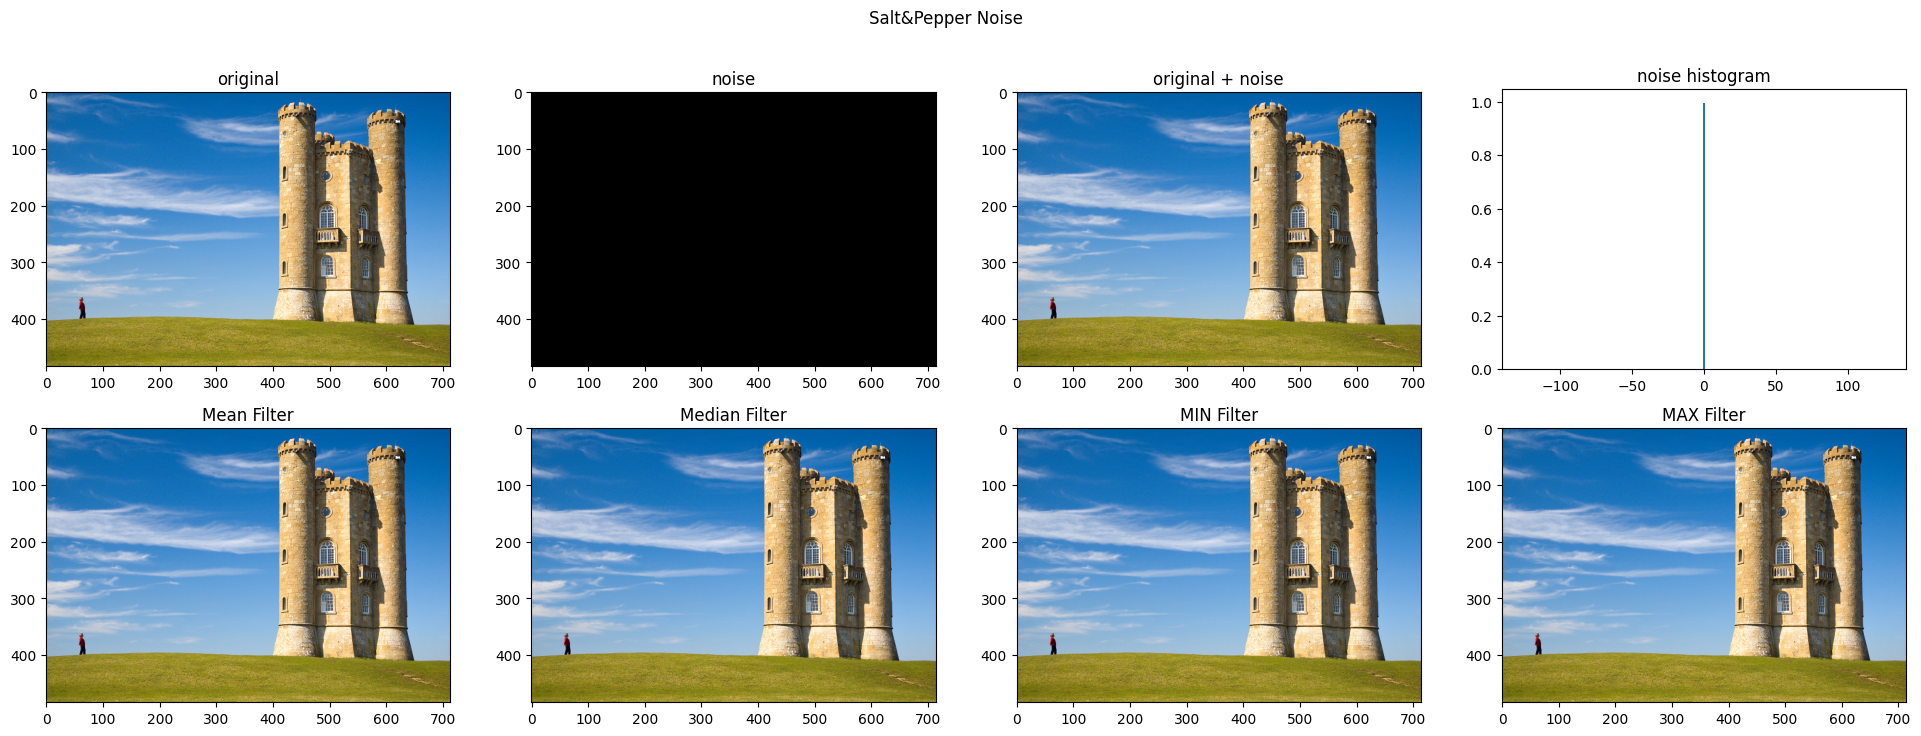

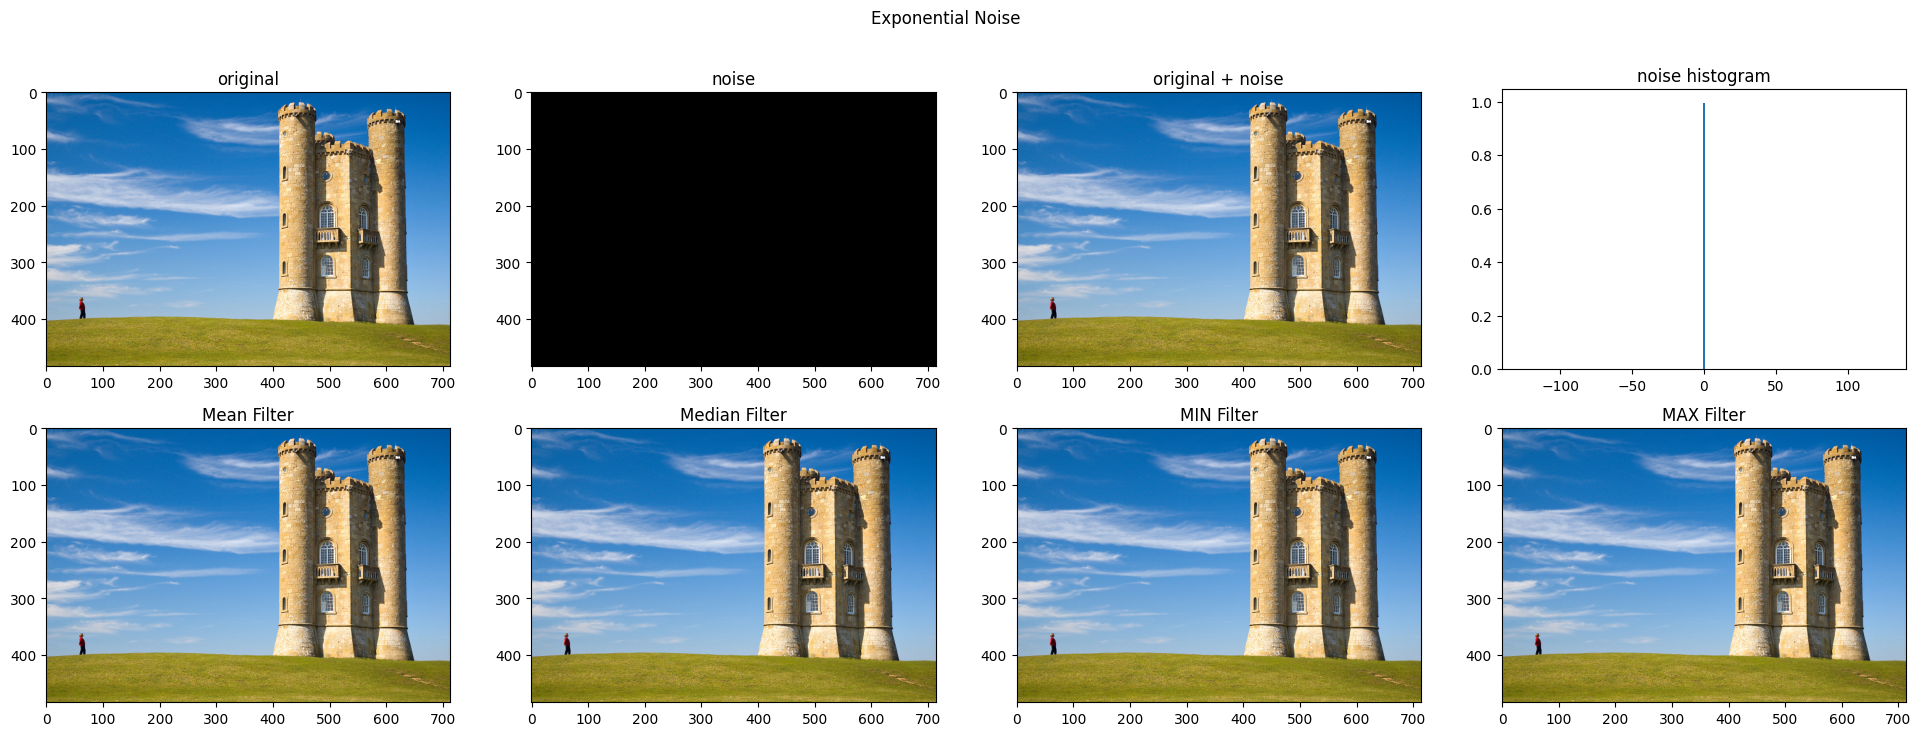

In [60]:
img = skimage.io.imread('https://github.com/CVUT-FS-12110/Machine-Perception-and-Image-Analysis/blob/master/src/lectures/08_image_restoration/data/tower.jpg?raw=true')

# PARAMETERS (have to be set)

# Uniform noise
low = -0.2
high = 0.2
# Gaussian noise
mu = None
sigma = None
# Salt&Pepper noise
p_pepper = None
p_salt = None
# Exponential noise
_lambda = None

# Mean filter
avg_kernel_size = None
avg_sigma_x = None
# Median blurring
median_blur_ksize = None
# MIN filter
min_kernel = None
# MAX filter
max_kernel = None

# Noise application
noise_source = {'Uniform Noise': uniform_noise(img, low, high),
                'Gaussian Noise': gaussian_noise(img, mu, sigma),
                'Salt&Pepper Noise': saltnpepper_noise(img, p_pepper, p_salt),
                'Exponential Noise': exponential_noise(img, _lambda)}

# Application of filters and plotting

for key, val in noise_source.items():
    fig = plt.figure(figsize= (24,8))
    plt.subplot(241)
    plt.suptitle(key)
    
    # Noise
    plt.imshow(img);
    plt.title('original')
    plt.subplot(242)
    plt.imshow(val[1]);
    plt.title('noise')
    plt.subplot(243)
    plt.imshow(val[0]);
    plt.title('original + noise')
    plt.subplot(244)
    plt.hist(val[2], density=True, bins=np.linspace(-128,128,256));
    plt.title('noise histogram');
    
    # Filters
    plt.subplot(245)
    plt.imshow(averaging(val[0], avg_kernel_size, avg_sigma_x));
    plt.title('Mean Filter')
    plt.subplot(246)
    plt.imshow(median_blurring(val[0], median_blur_ksize));
    plt.title('Median Filter')
    plt.subplot(247)
    plt.imshow(min_filter(val[0], min_kernel));
    plt.title('MIN Filter')
    plt.subplot(248)
    plt.imshow(max_filter(val[0], max_kernel));
    plt.title('MAX Filter');

    
